In [ ]:
#importing libraries
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np




In [ ]:
#load the dataset
(X_train,Y_train),(X_test,Y_test)= datasets.cifar10.load_data()
print('Length of training set = ',(len(X_train)))
print('Length of testing set = ',(len(X_test)))

Length of training set =  50000
Length of testing set =  10000


In machine learning, especially when working with neural networks, it's common to have labels in the form of arrays. In the case of CIFAR-10, each label in y_train is initially a 2D array with shape (1, 1) because of the way it's loaded by datasets.cifar10.load_data().

The .reshape(-1) operation is used to flatten this 2D array into a 1D array. The -1 argument in the reshape function is a placeholder for an unknown dimension, and it is inferred based on the size of the original array. In this case, it's used to flatten the array.


['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
[4]


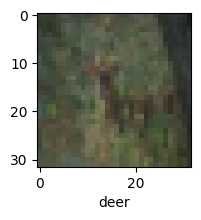

In [ ]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
def plot_sample(X,Y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  print(Y[index])
  plt.xlabel(classes[(Y[index][0])]) # Use Y[index][0] to get the integer value
print(classes)
Y_trian = Y_train.reshape(-1)
plot_sample(X_train,Y_train,10)

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [63]:
#building CNN
cnn=models.Sequential([
layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
layers.MaxPool2D((2,2)),
layers.Flatten(),
layers.Dense(64,activation="relu"),
layers.Dense(10,activation="softmax")
])

In [64]:
cnn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_16 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 12544)             0         
                                                                 
 dense_13 (Dense)            (None, 64)                802880    
                                                                 
 dense_14 (Dense)            (None, 10)                650       
                                                      

In [65]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn.fit(X_train,Y_train,epochs=10)


Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 2.0469 - accuracy: 0.2609
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8517 - accuracy: 0.3407
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7828 - accuracy: 0.3618
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7319 - accuracy: 0.3800
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6677 - accuracy: 0.4031
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6263 - accuracy: 0.4178
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5976 - accuracy: 0.4299
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5760 - accuracy: 0.4389
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5584 - accuracy: 0.4476
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.546

In [66]:
cnn.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.5316 - accuracy: 0.4529


[1.5315643548965454, 0.4528999924659729]

In [67]:
# Evaluate the model on the test set
y_pred_probs = cnn.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)


313/313 [==============================] - 1s 3ms/step


In [68]:
from sklearn.metrics import classification_report
# Evaluate the model on the test set
# Print the classification report
report = classification_report(Y_test, y_pred, target_names=classes)
print(report)


              precision    recall  f1-score   support

    airplane       0.61      0.45      0.52      1000
  automobile       0.53      0.55      0.54      1000
        bird       0.33      0.36      0.34      1000
         cat       0.30      0.28      0.29      1000
        deer       0.37      0.34      0.36      1000
         dog       0.46      0.27      0.34      1000
        frog       0.41      0.66      0.51      1000
       horse       0.54      0.48      0.51      1000
        ship       0.55      0.62      0.58      1000
       truck       0.48      0.52      0.50      1000

    accuracy                           0.45     10000
   macro avg       0.46      0.45      0.45     10000
weighted avg       0.46      0.45      0.45     10000



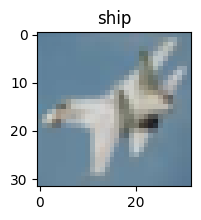

In [72]:
def pplot_sample(X, Y, index):
    X=X*255
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    predicted_class_index = Y[index]

    # Ensure the predicted class index is an integer
    if isinstance(predicted_class_index, np.ndarray):
        predicted_class_index = predicted_class_index[0]

    plt.title(classes[predicted_class_index])
    plt.show()
pplot_sample(X_test,y_pred,10)